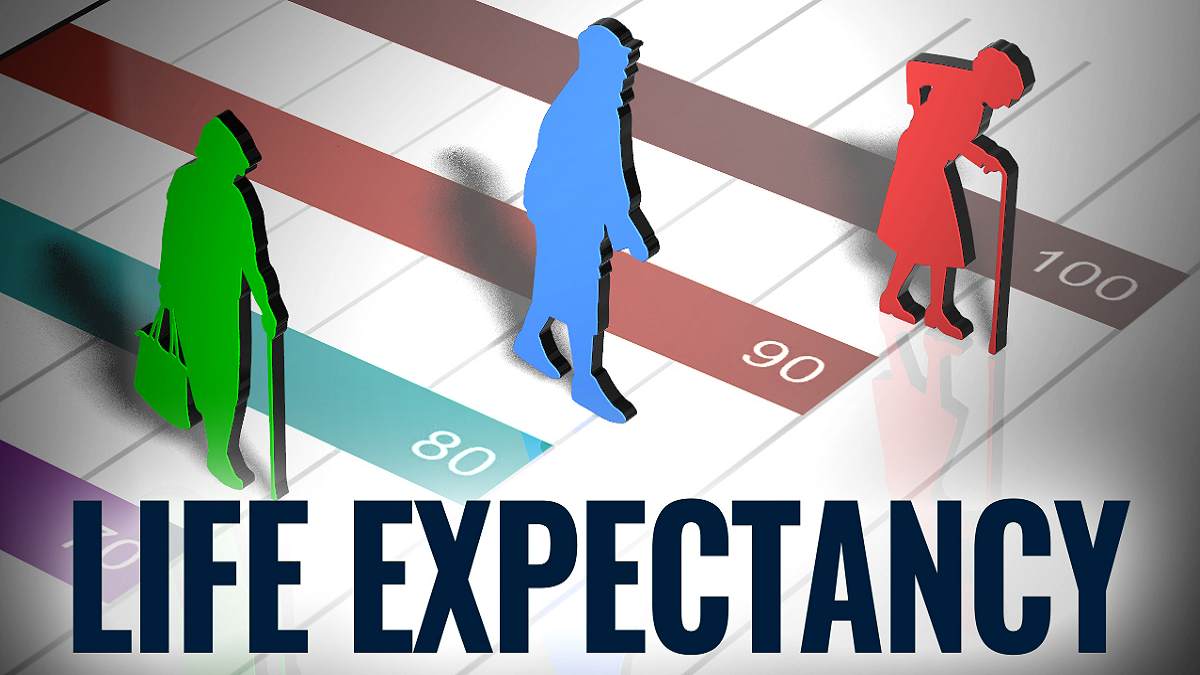<CENTER>

### The term “life expectancy” refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die.

#### CONTENT

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. 

### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

### Loading Datasets

In [5]:
df=pd.read_csv('./Life Expectancy Data.csv')

In [6]:
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.shape

(2938, 22)

### Checking null values

In [6]:
df.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

### dropping null values

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().mean()*100

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Rename columns

In [9]:
df.rename(columns={'Life expectancy ':'Life_expectancy', 'Adult Mortality':'Adult_Mortality',
       'infant deaths':'infant_deaths','percentage expenditure':'percentage_expenditure', 'Hepatitis B':'Hepatitis_B',
       'Measles ':'Measles', ' BMI ':'BMI', 'under-five deaths ':'under_five_deaths','Total expenditure':'Total_expenditure',
       'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV_AIDS', ' thinness  1-19 years':'thinness_1_19_years',
       ' thinness 5-9 years':'thinness_5_9_years', 'Income composition of resources':'Income_composition_of_resources'},inplace=True)

In [10]:
df

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total_expenditure  Diphtheria  HIV_AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness_1_19_years  thinness_5_9_years  \
0     33736494.0                 17.2                17.3   
1       327582.0                 17.5                17.5   
2     31731688.0                 17.7                17.7   
3      3696958.0                 17.9                18.0   
4      2978599.0                 18.2                18.2   
...          ...                  ...                 ...   
2933  12777511.0                  9.4                 9.4   
2934  12633897.0                  9.8                 9.9   
2935    125525.0                  1.2                 1.3   
2936  12366165.0                  1.6                 1.7   
2937  12222251.0                 11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                     

In [12]:
df.duplicated().sum()

0

### Drop unwanted column

In [13]:
df.drop(columns='Status',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Life_expectancy                  1649 non-null   float64
 3   Adult_Mortality                  1649 non-null   float64
 4   infant_deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage_expenditure           1649 non-null   float64
 7   Hepatitis_B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9   BMI                              1649 non-null   float64
 10  under_five_deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total_expenditure   

# Univariate analysis

### histplot

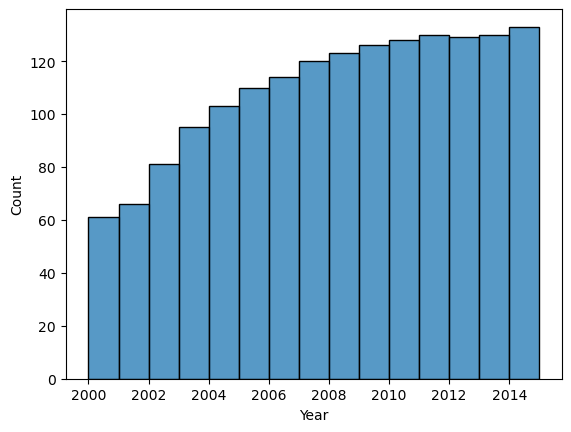

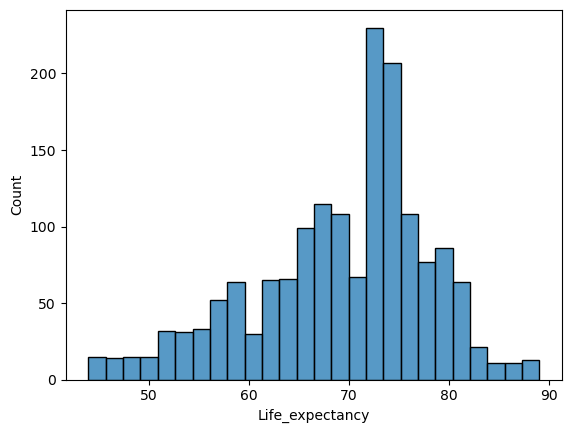

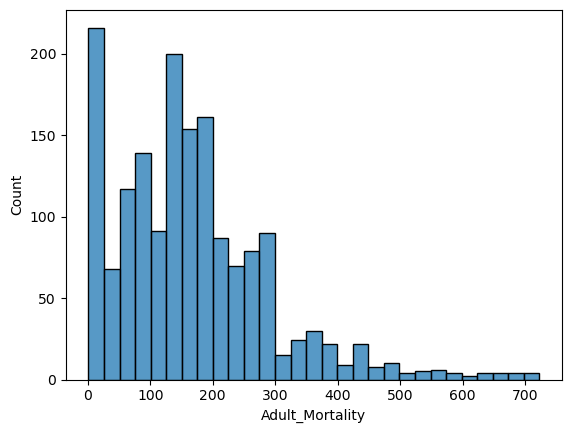

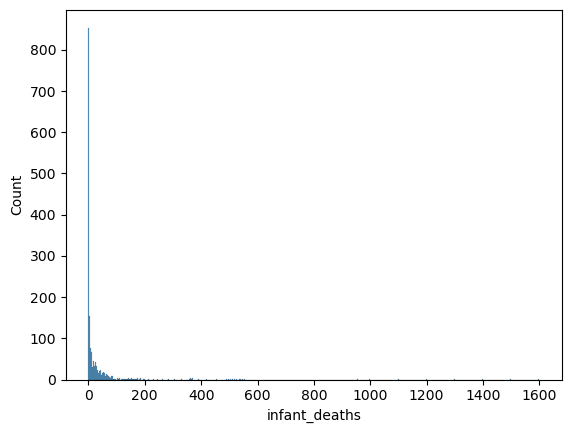

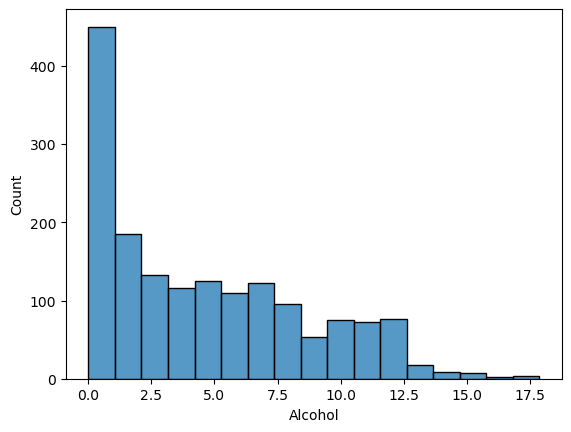

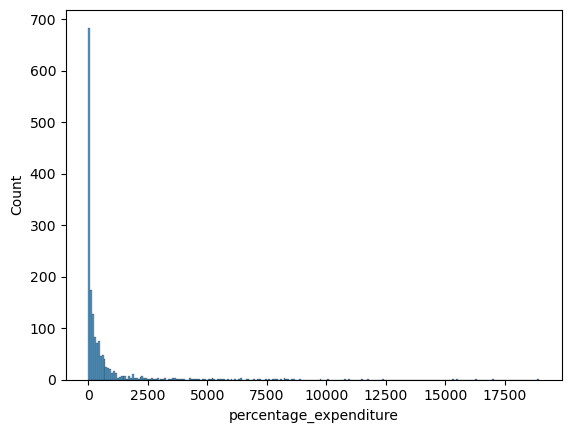

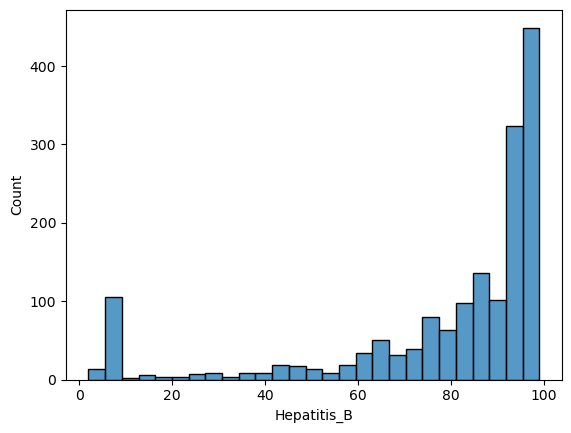

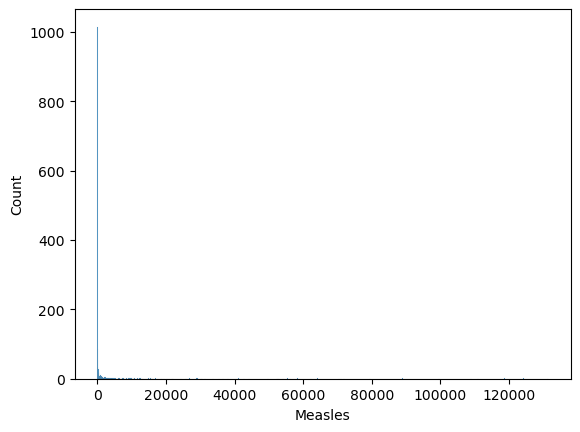

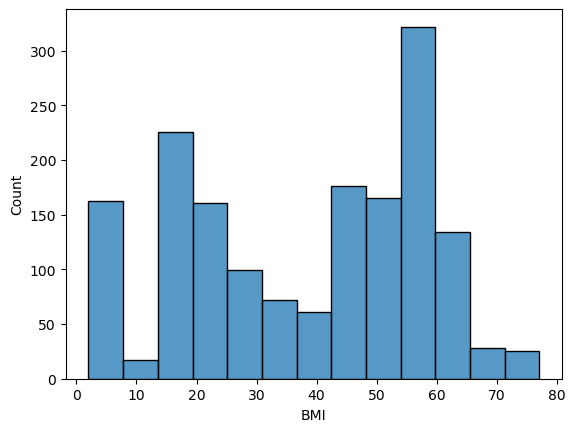

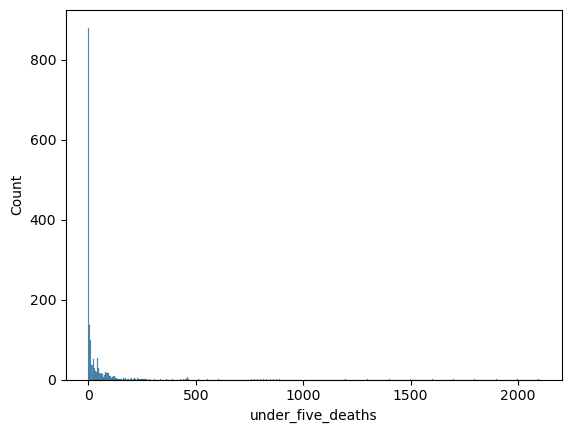

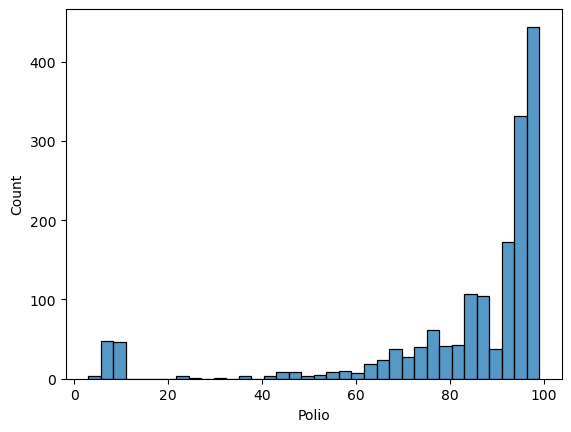

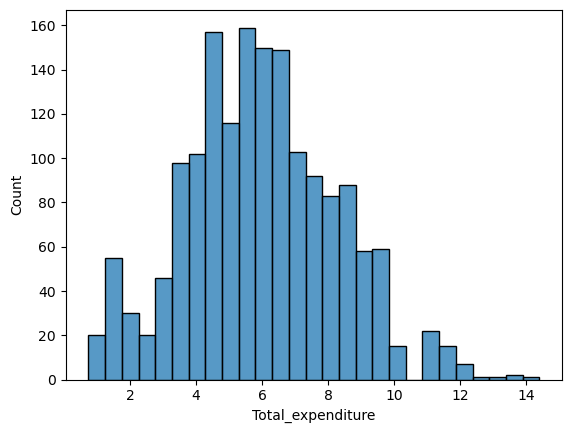

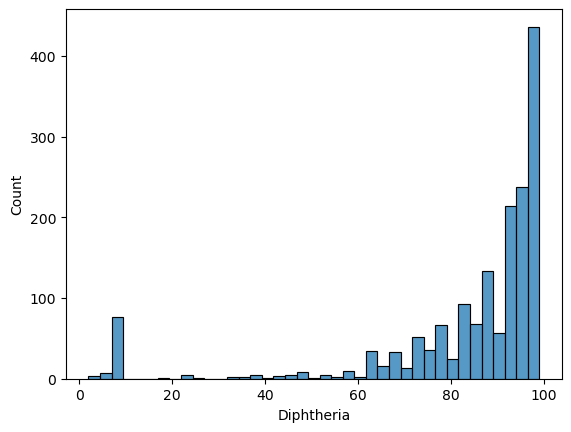

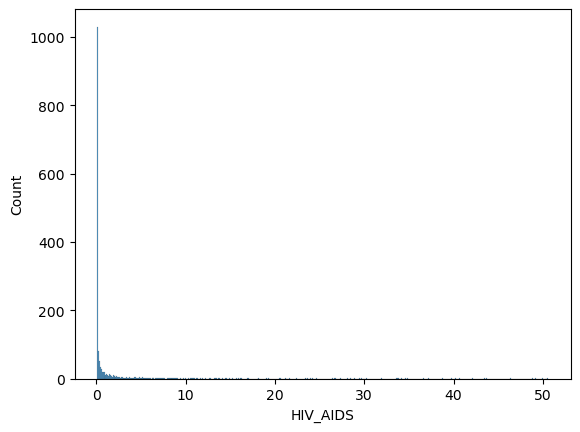

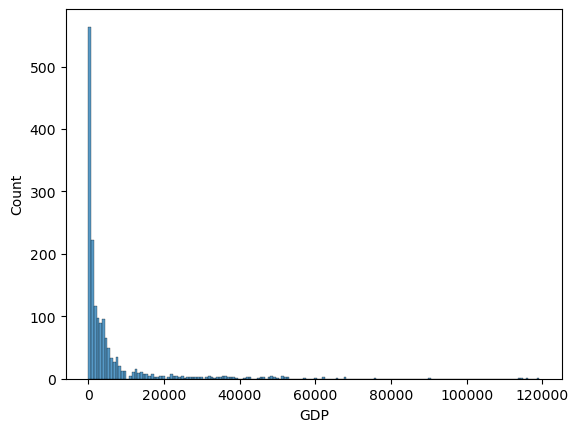

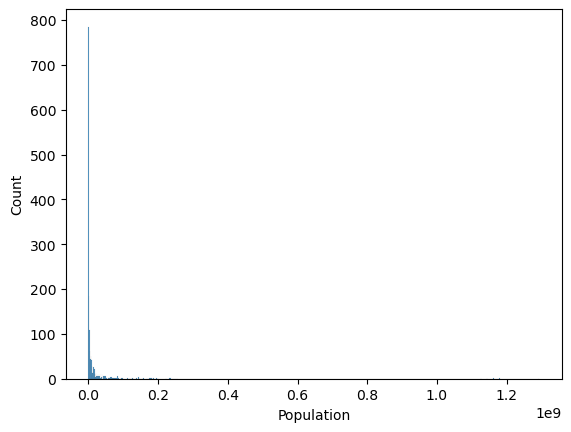

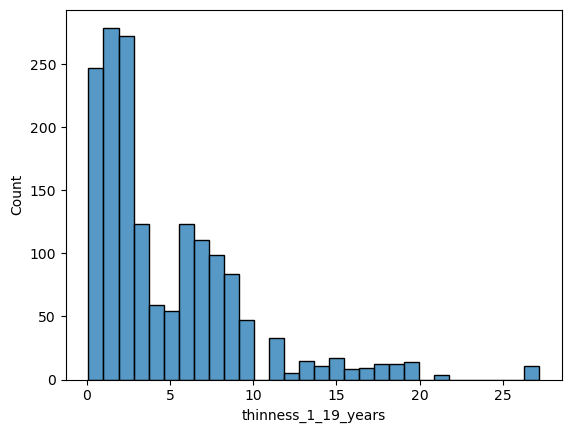

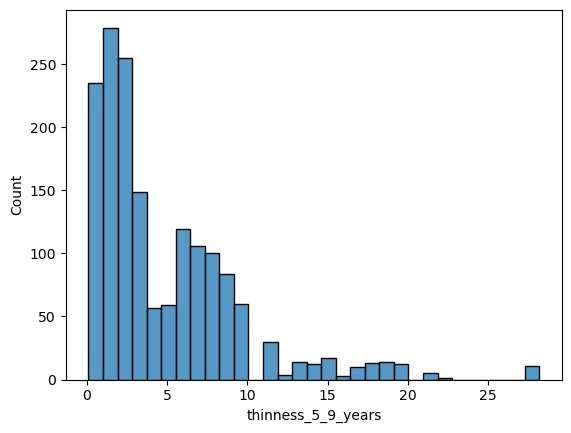

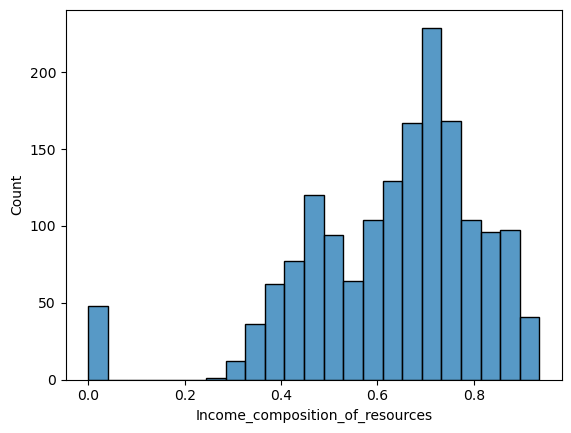

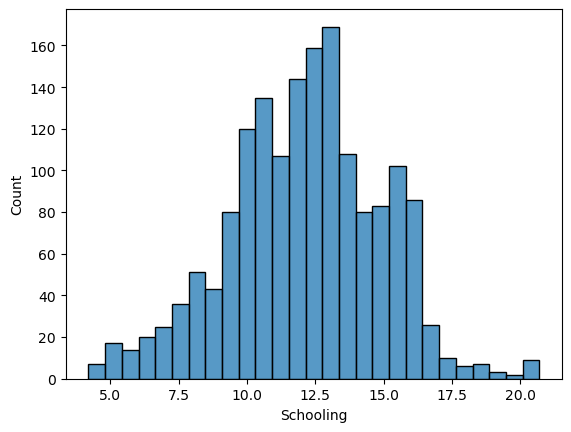

In [15]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.histplot(x=df[i])
        plt.show()

### kdeplot

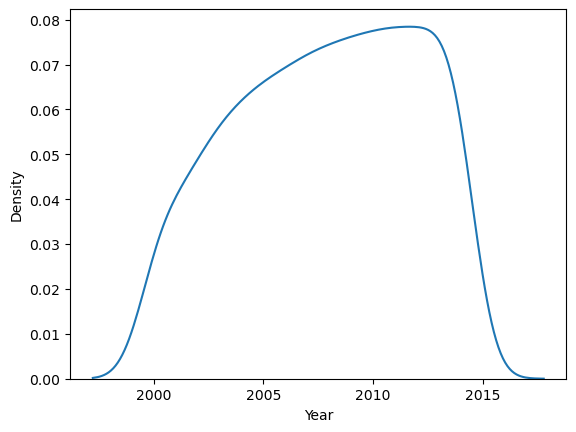

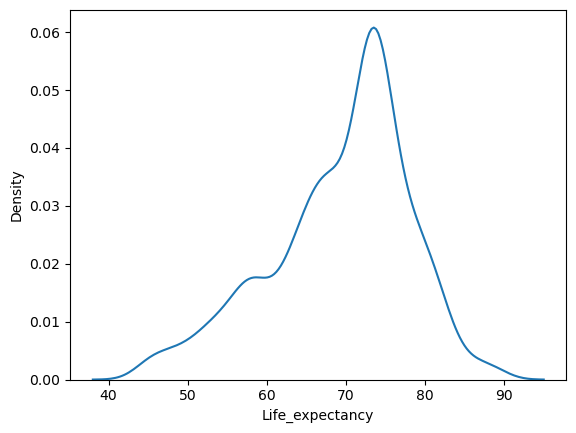

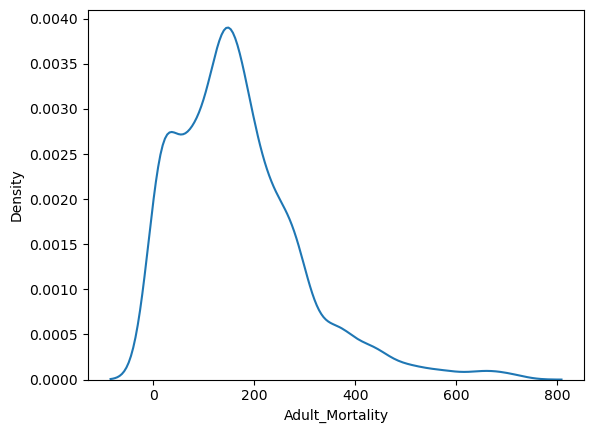

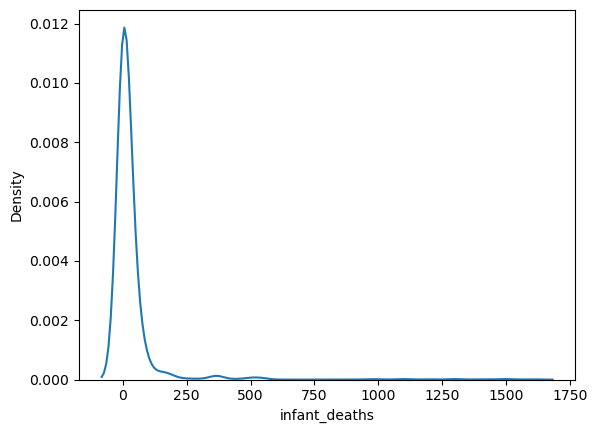

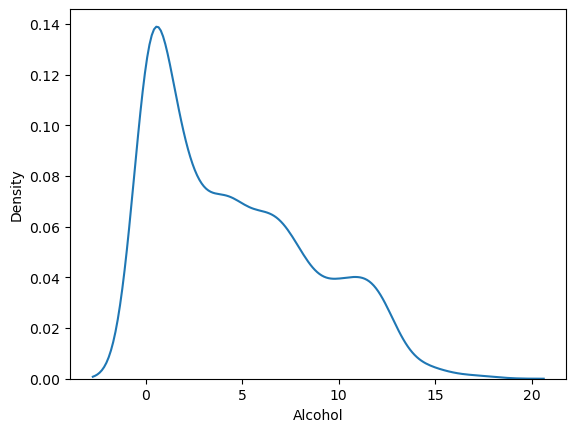

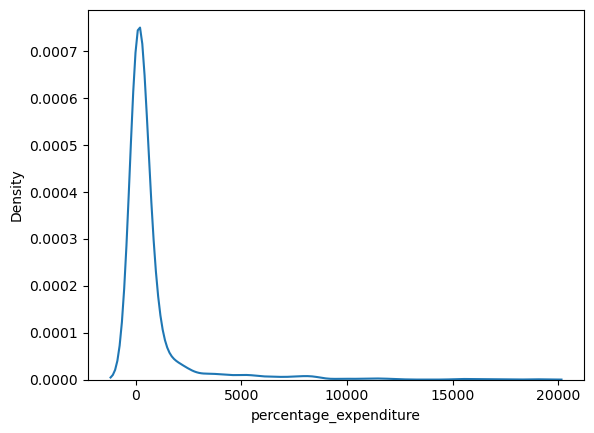

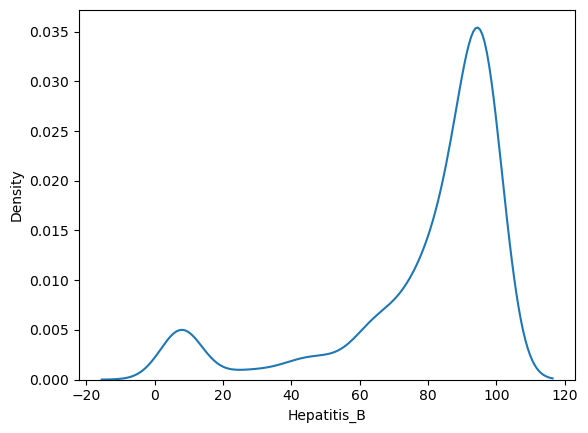

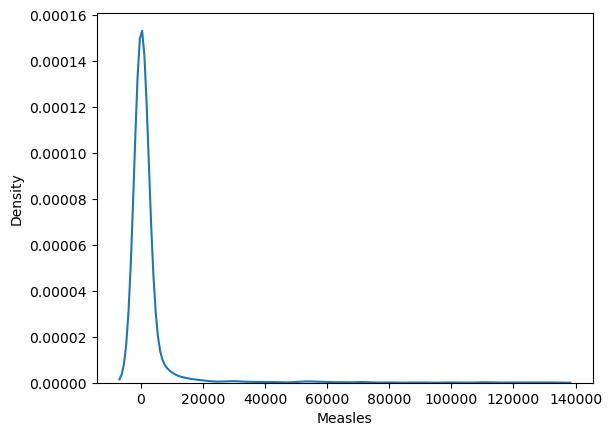

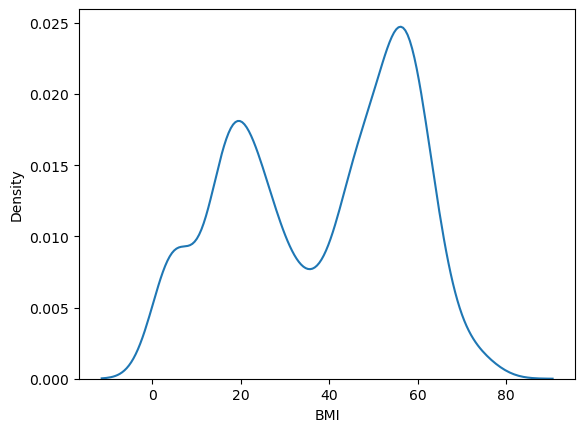

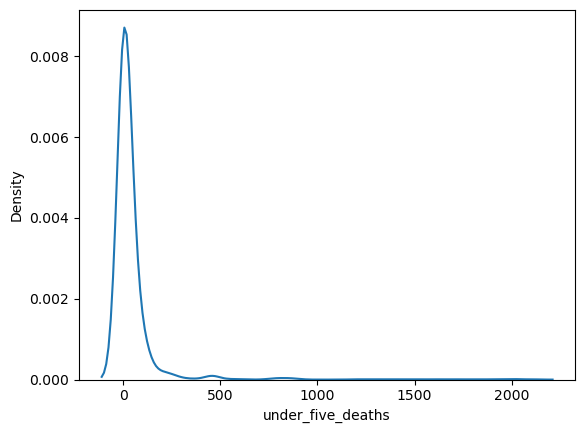

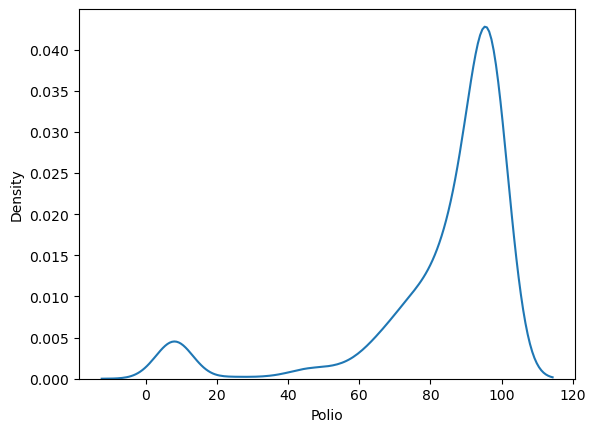

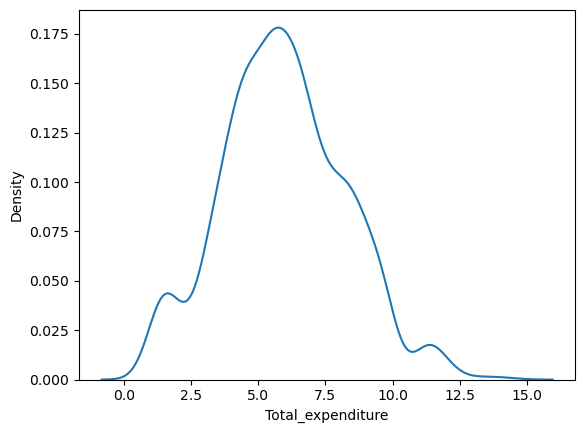

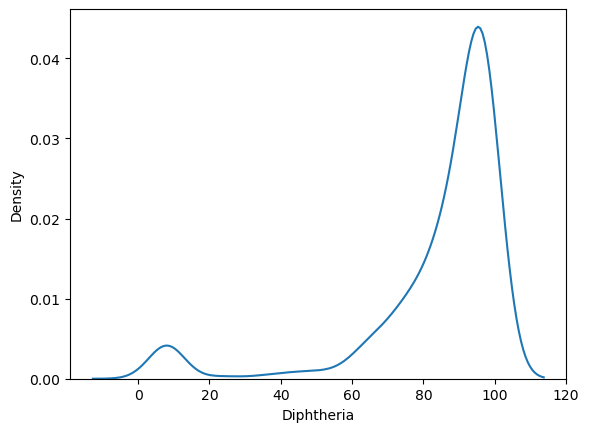

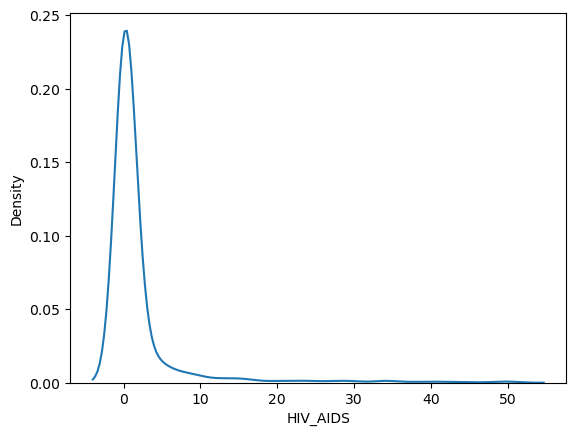

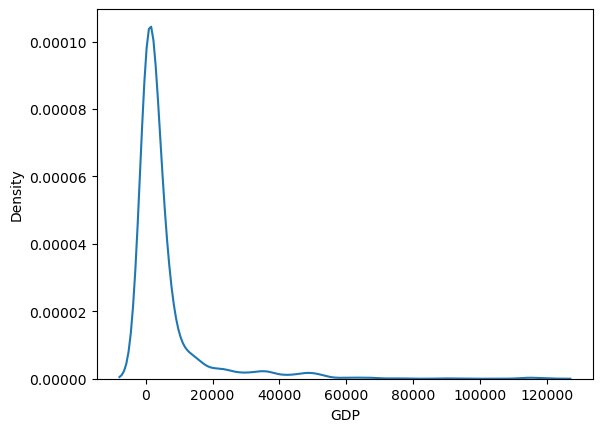

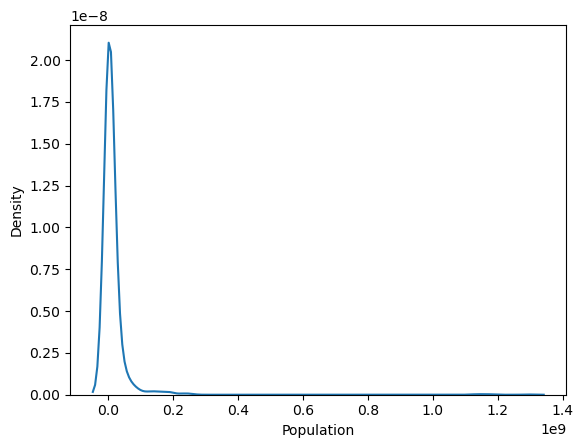

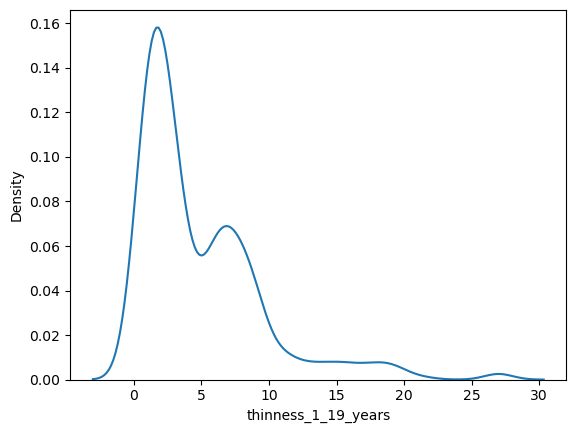

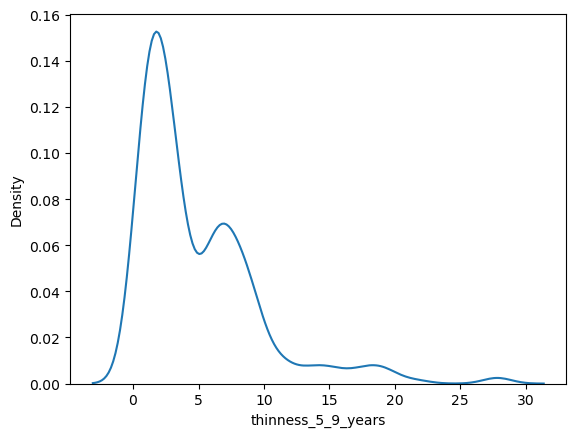

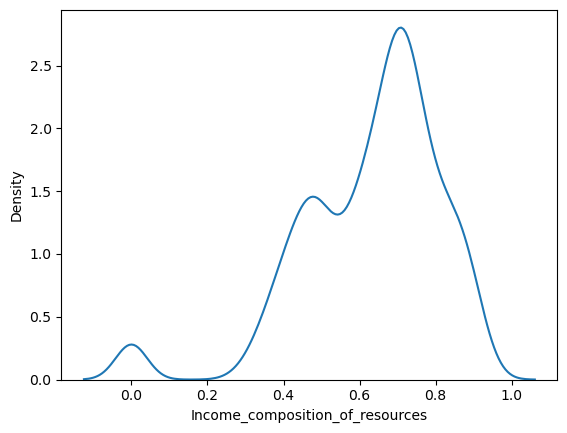

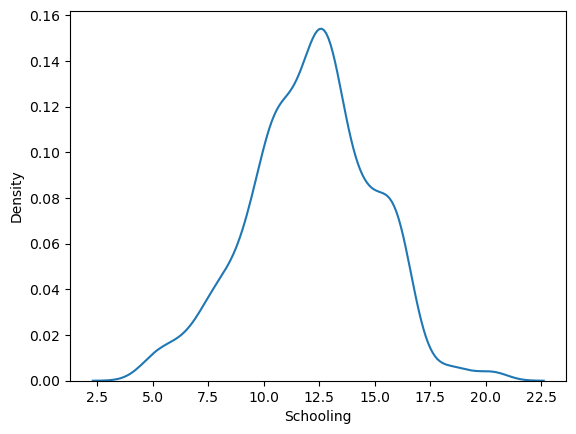

In [16]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.kdeplot(x=df[i])
        plt.show()

### boxplot

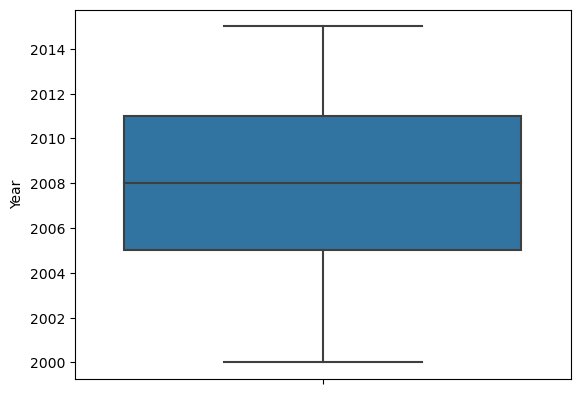

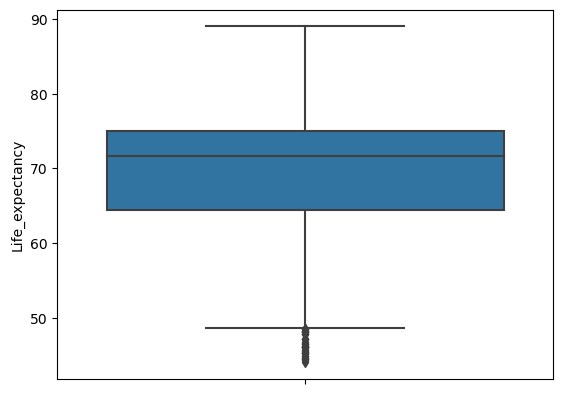

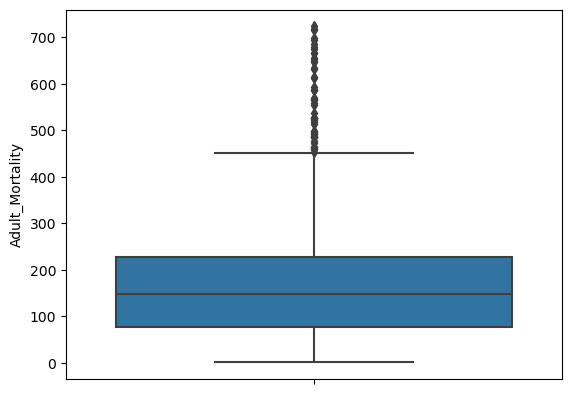

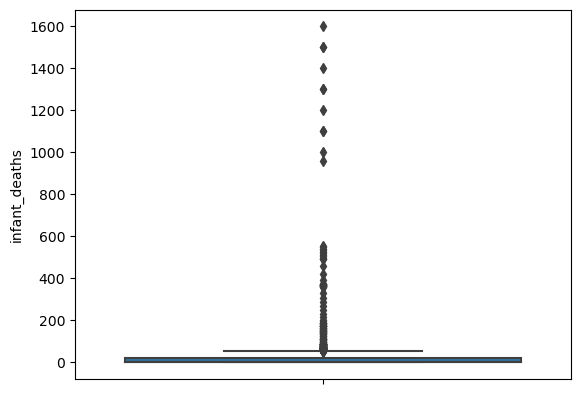

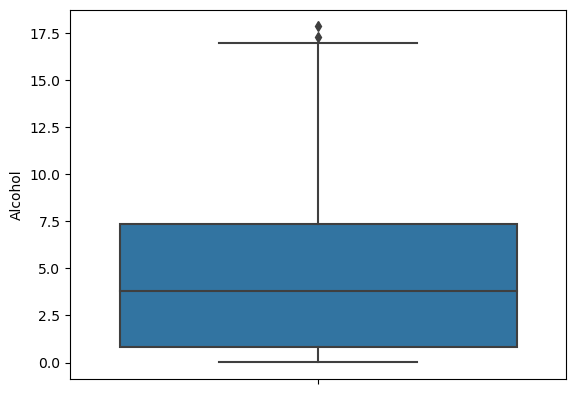

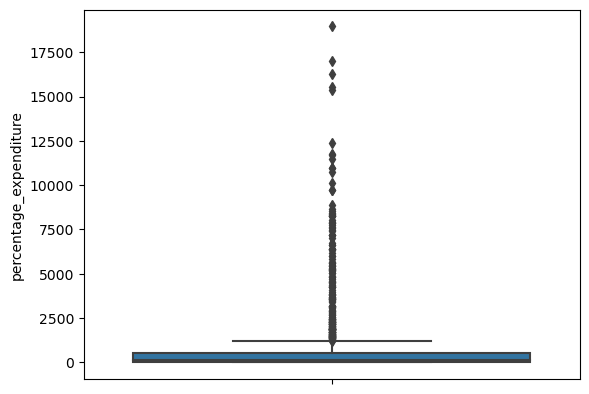

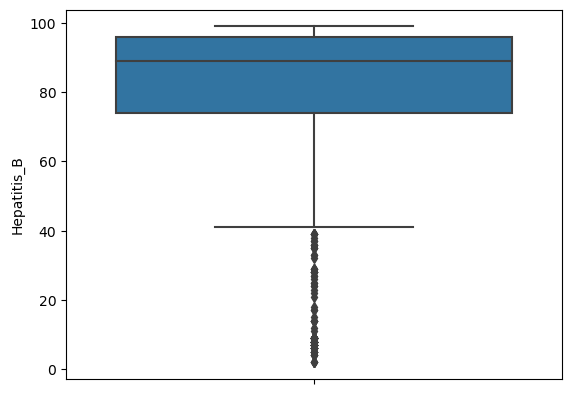

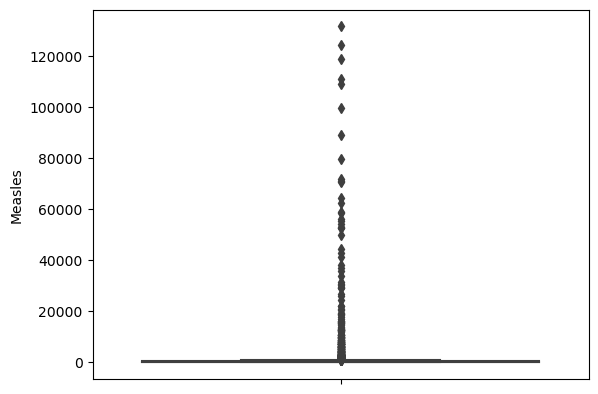

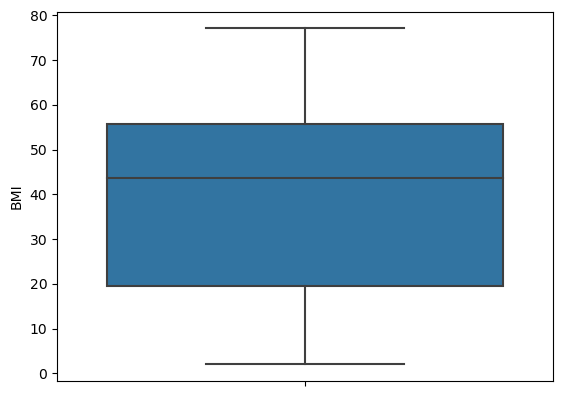

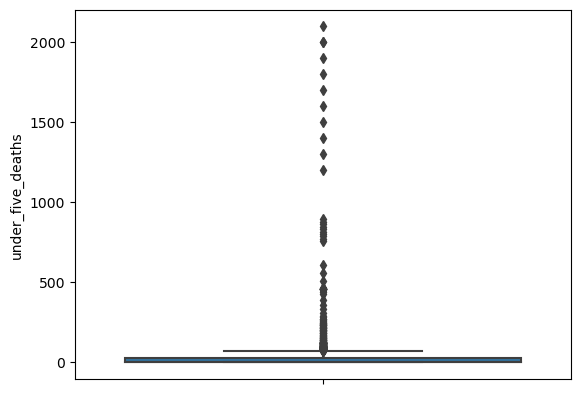

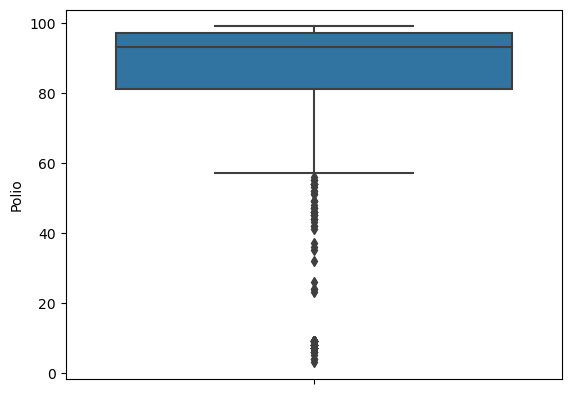

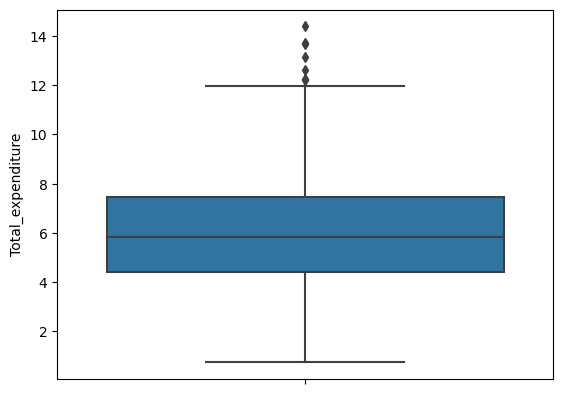

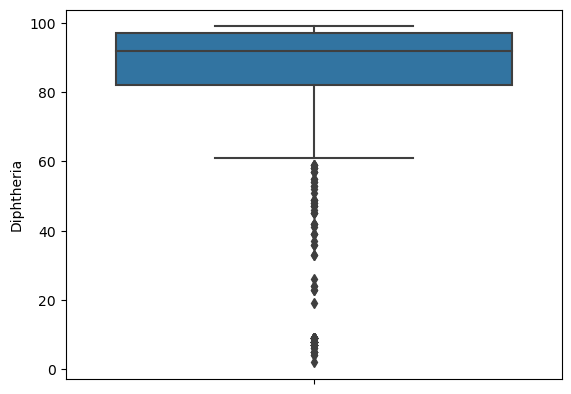

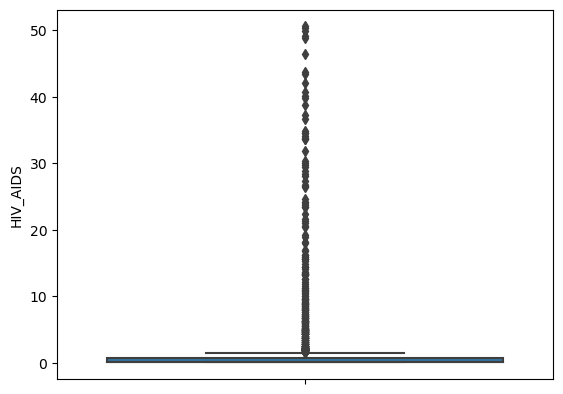

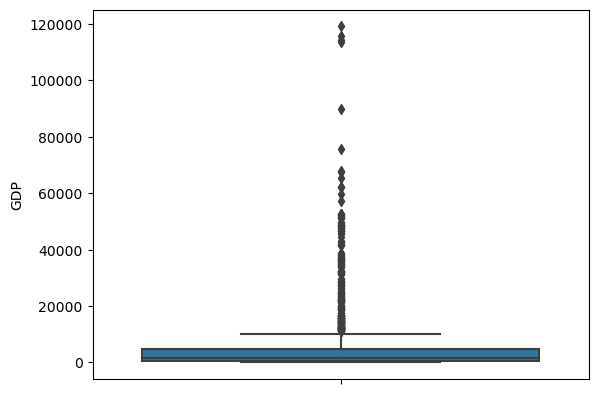

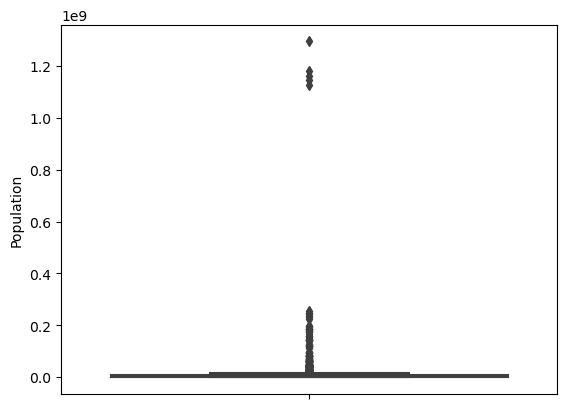

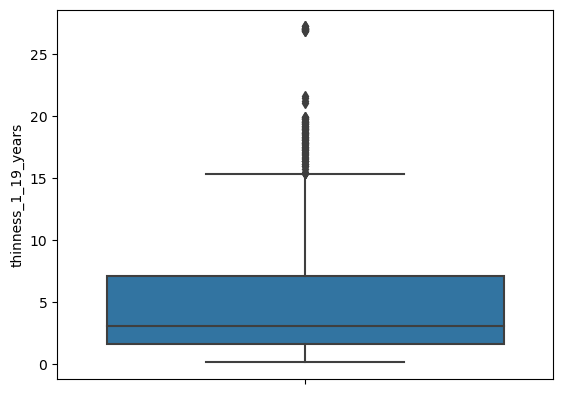

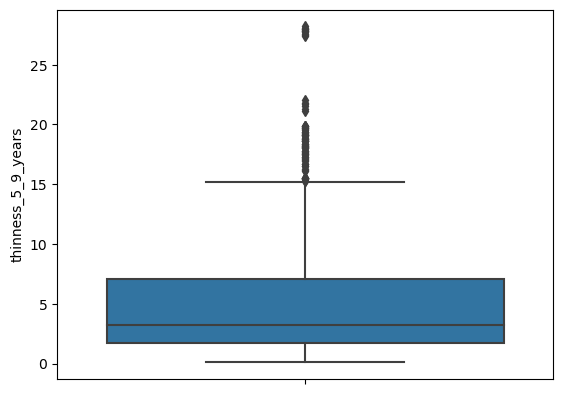

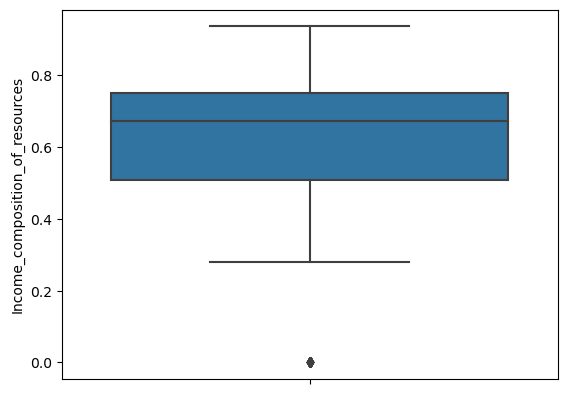

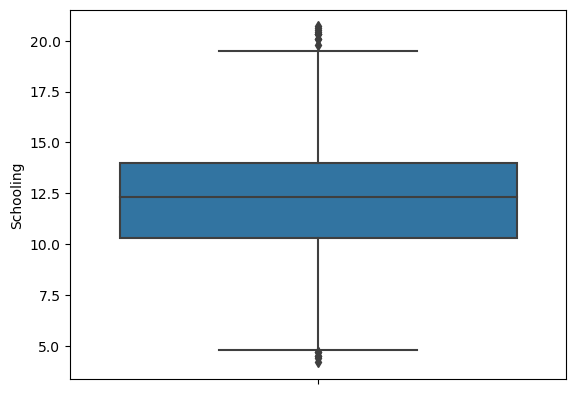

In [17]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(y=df[i])
        plt.show()

# Multivariate Analysis

### line plot

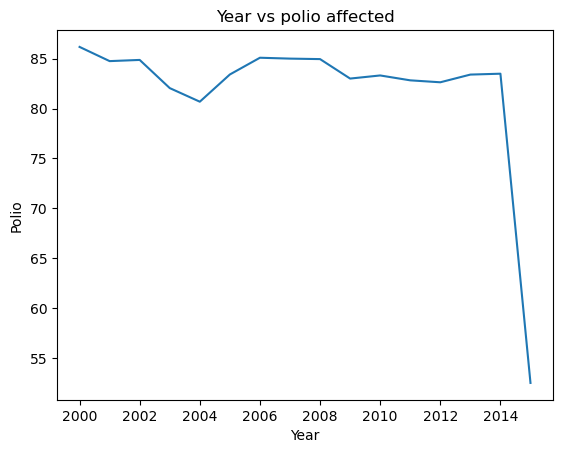

In [18]:
sns.lineplot('Year','Polio', data=df.sort_values(by='Year',ascending=True),ci=None)
plt.title("Year vs polio affected")
plt.show()

Text(0.5, 1.0, 'VARIATION IN HIV AIDS OVER THE YEARS')

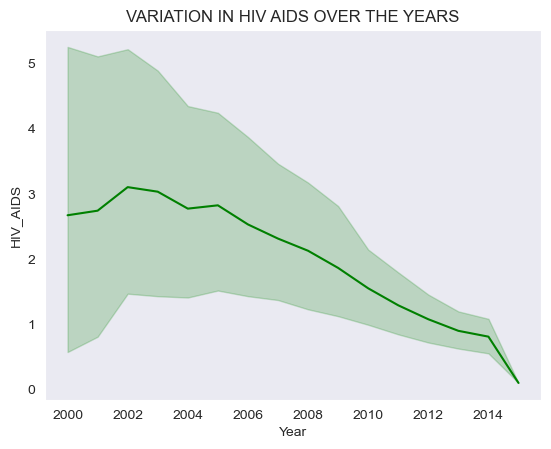

In [19]:
sns.set_style('dark')
sns.lineplot(x='Year',y='HIV_AIDS',data=df.sort_values(by='Year'),color='green');
plt.title("VARIATION IN HIV AIDS OVER THE YEARS")

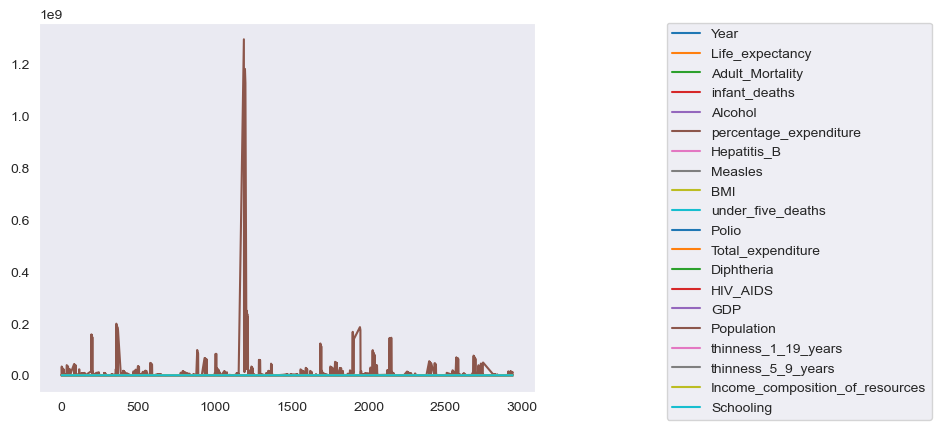

In [20]:
df.plot.line()
plt.legend(bbox_to_anchor=(1.8,1),loc='upper right',borderaxespad=0)
plt.show()

### Barplot

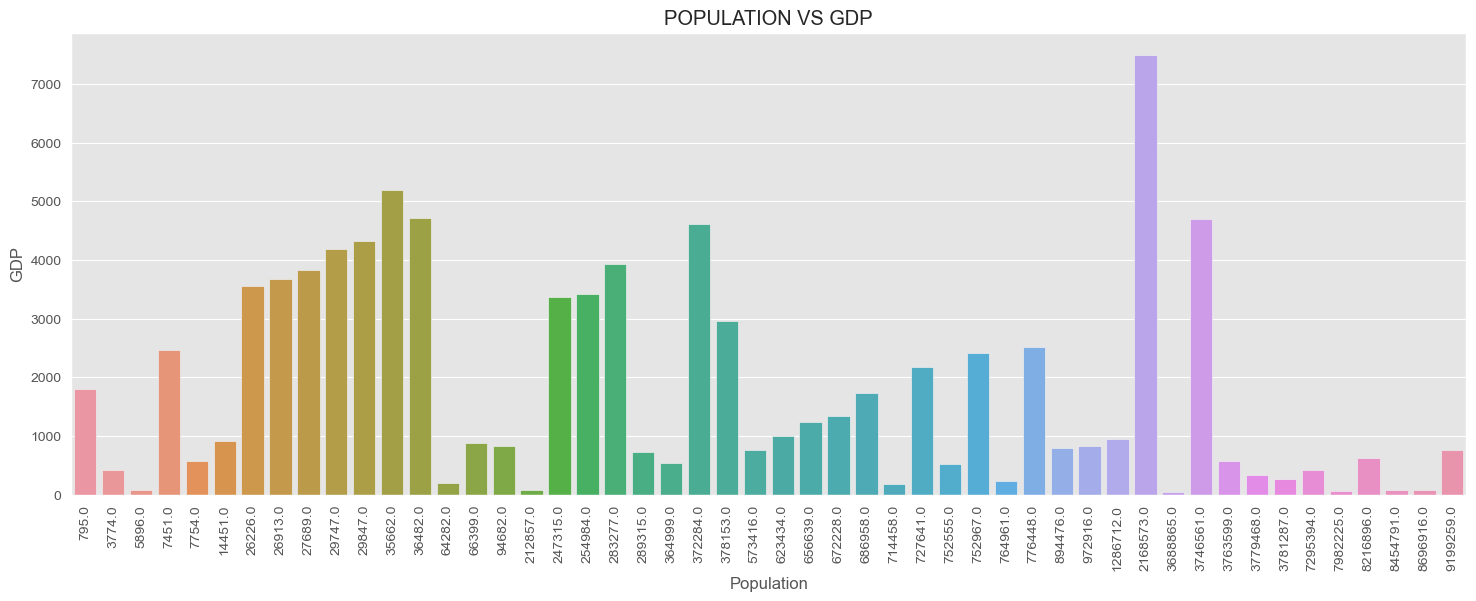

In [23]:
plt.figure(figsize=(18,6))
sns.barplot(x='Population',y='GDP',data=df[170:220])
plt.title('POPULATION VS GDP')
plt.xticks(rotation=90)
plt.style.use('ggplot')

## violinplot

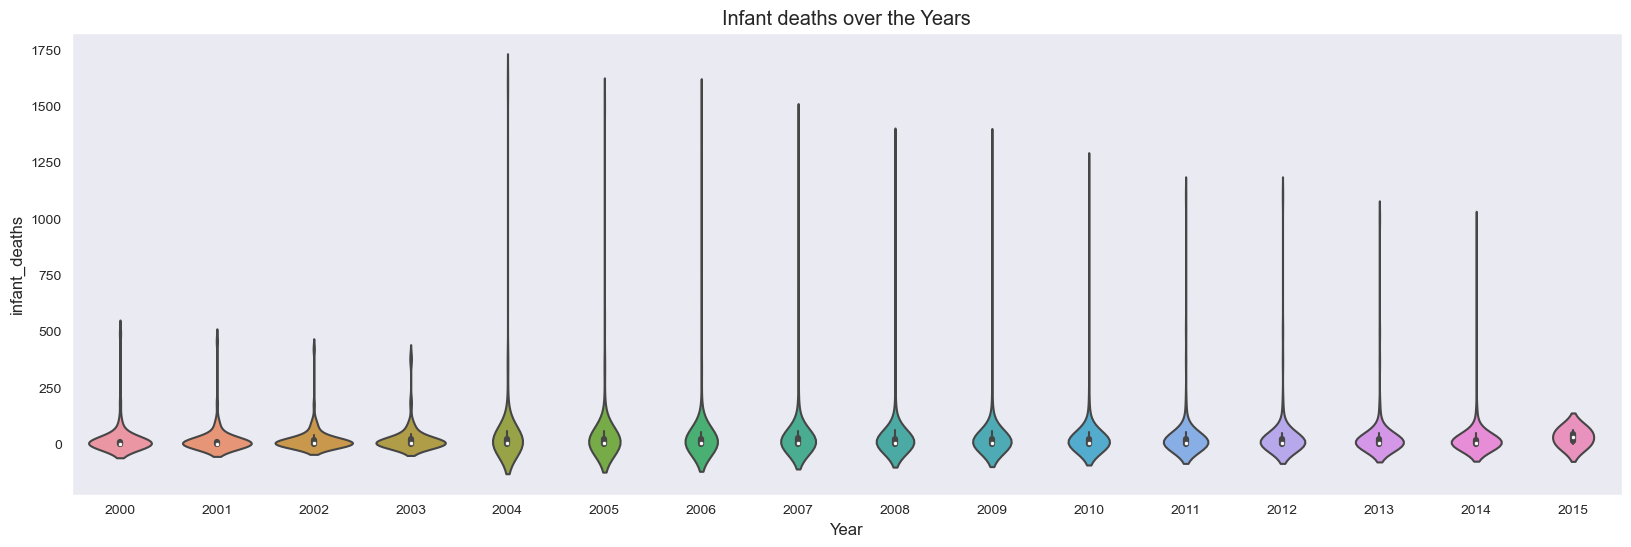

In [31]:
plt.figure(figsize=(20,6))
sns.set_style('dark')
sns.violinplot(x='Year',y='infant_deaths',data=df.sort_values(by='Year',ascending=True))
plt.title('Infant deaths over the Years')
plt.show()

### pairplot

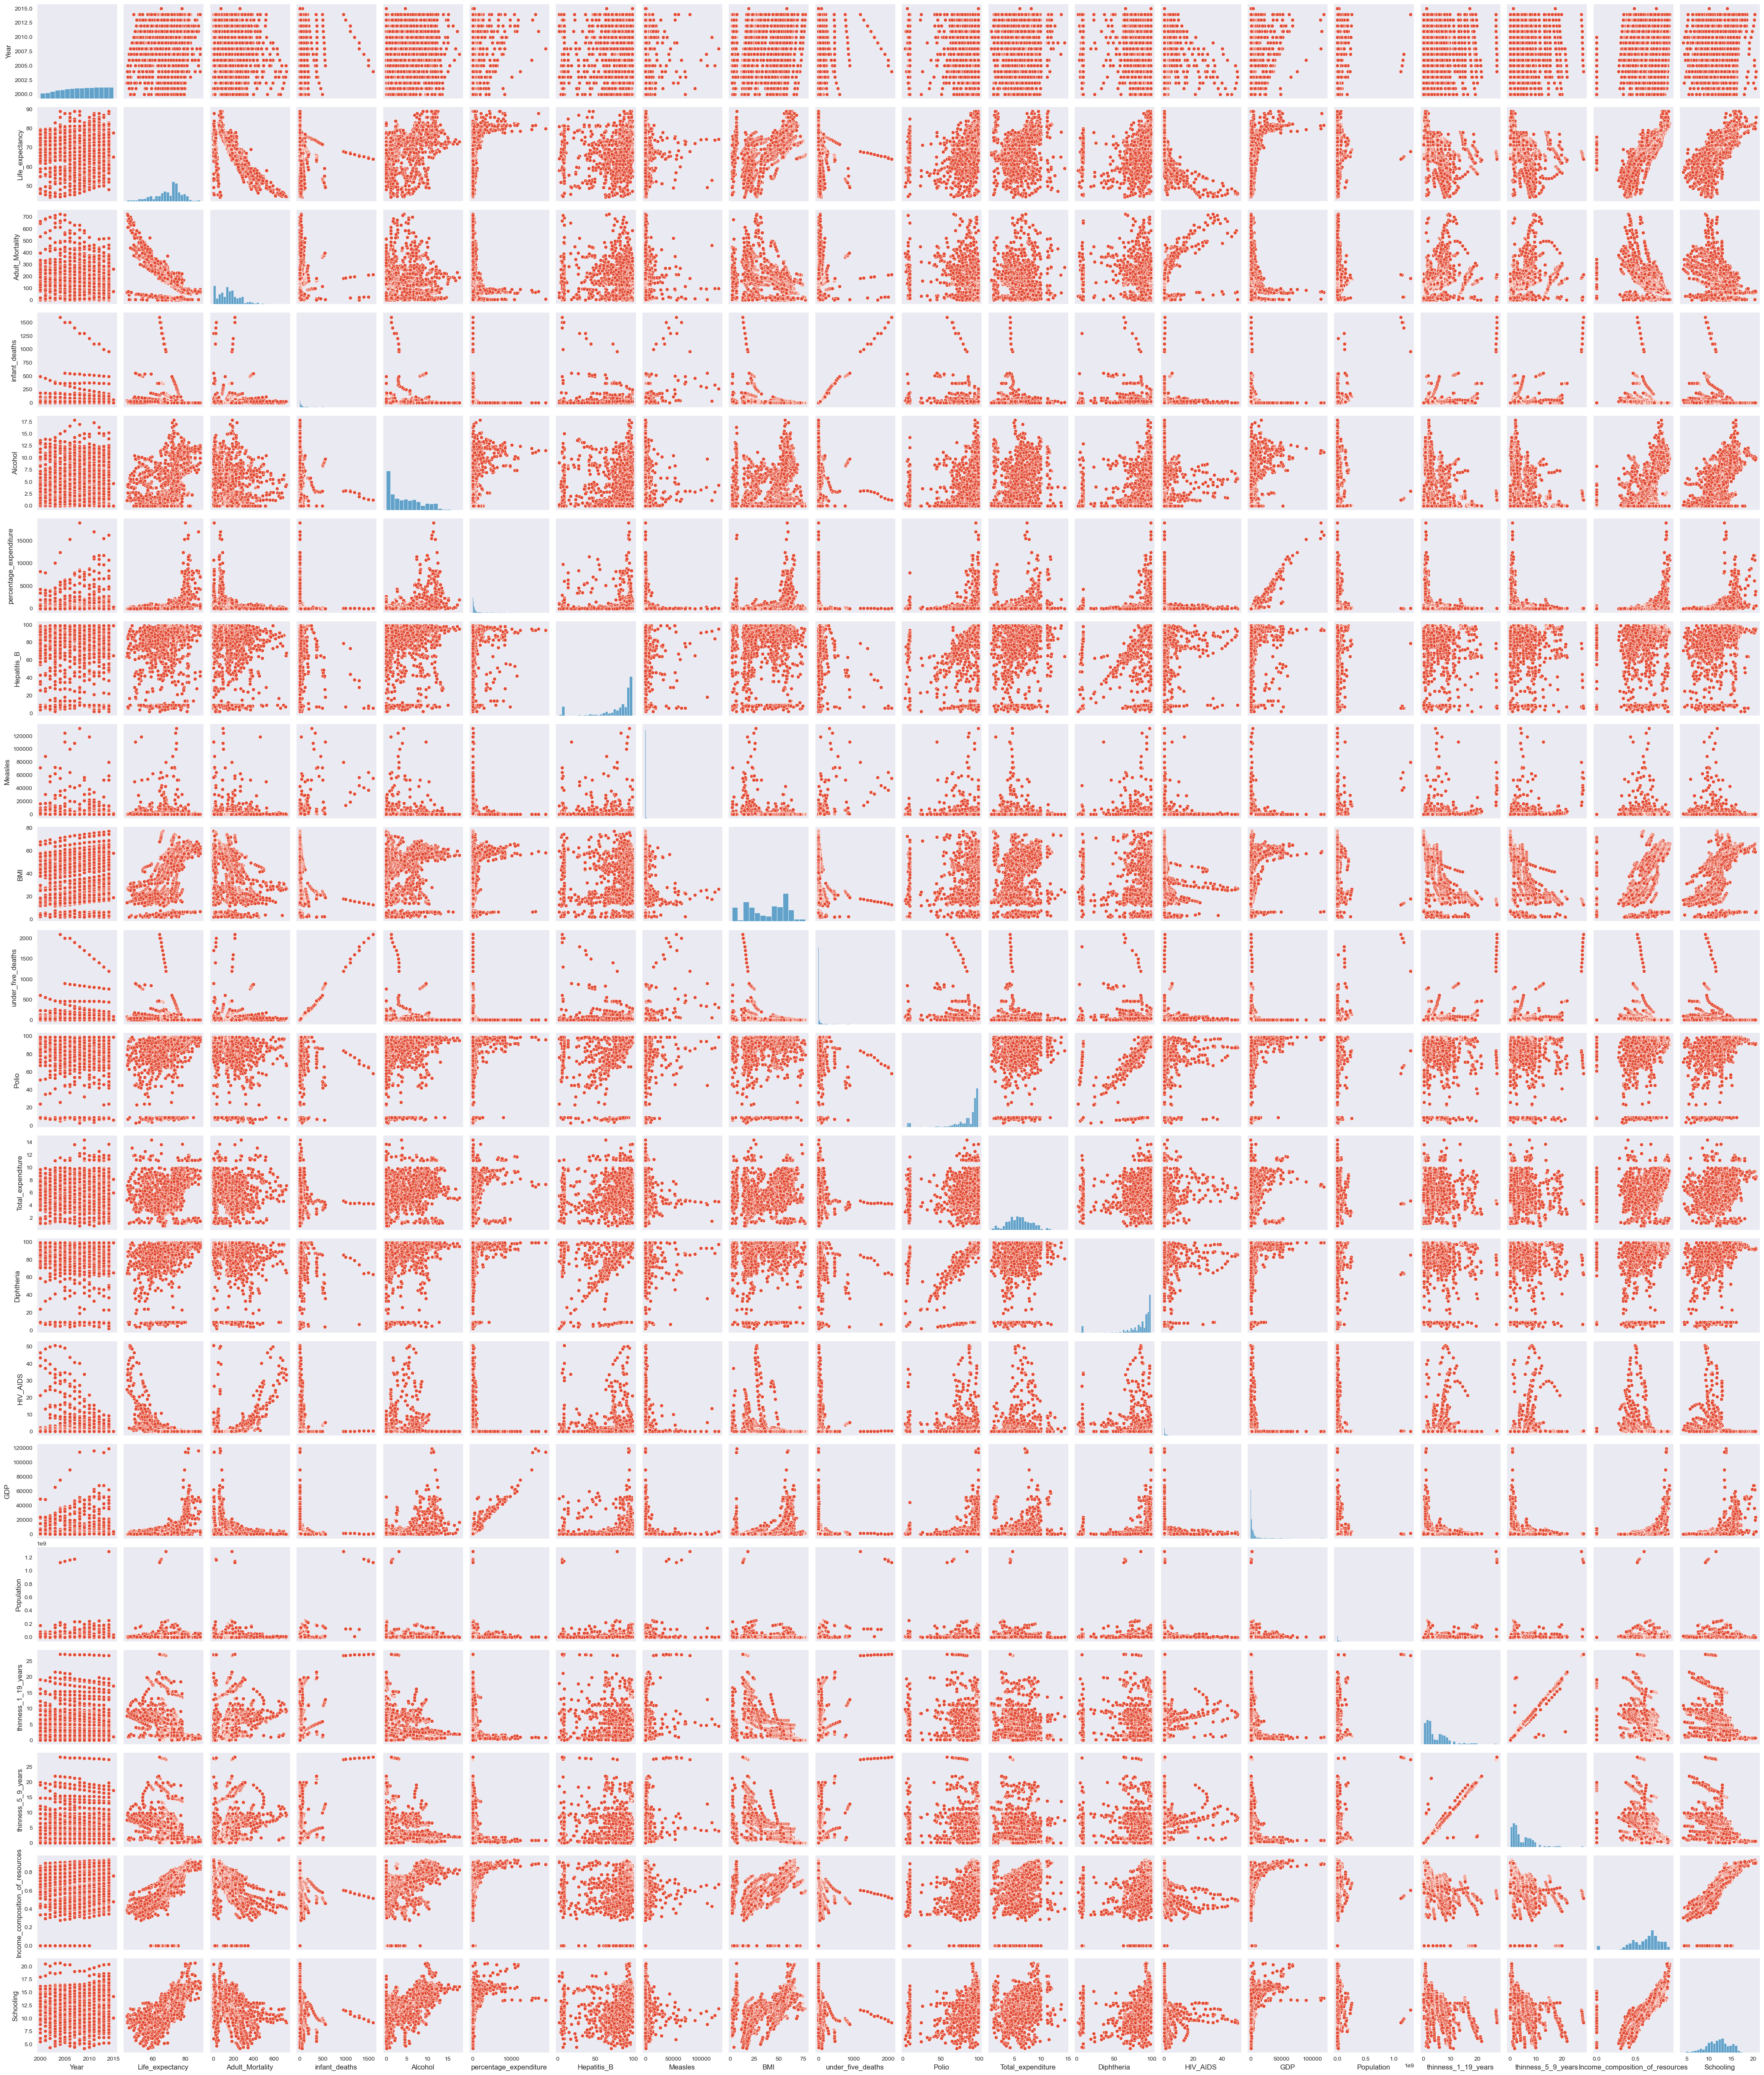

In [33]:
sns.pairplot(data=df,aspect=.85);;

# setting outliers

In [34]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [35]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

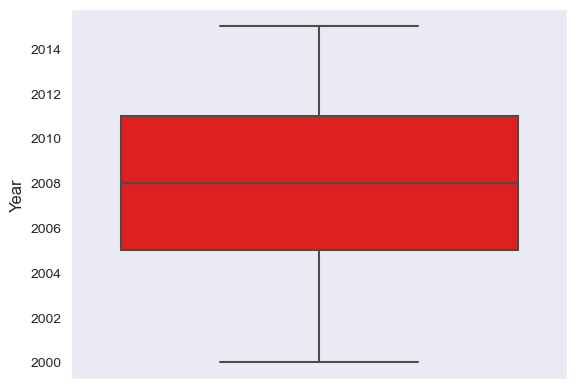

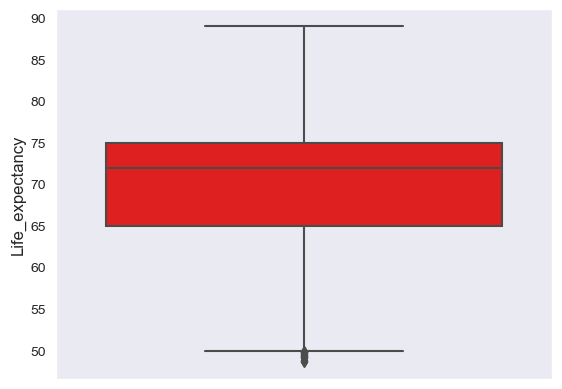

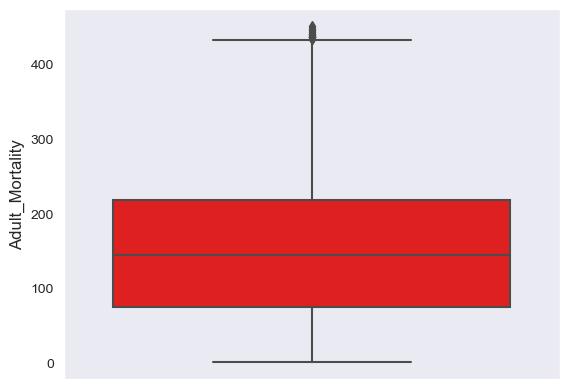

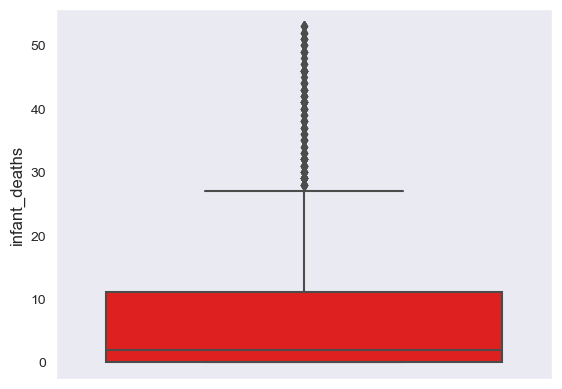

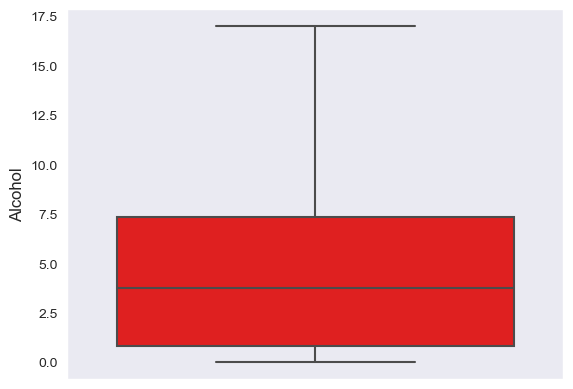

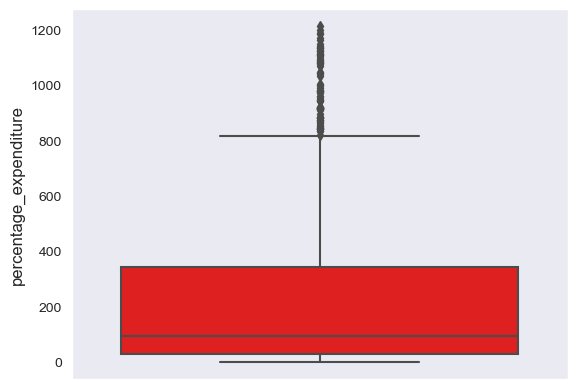

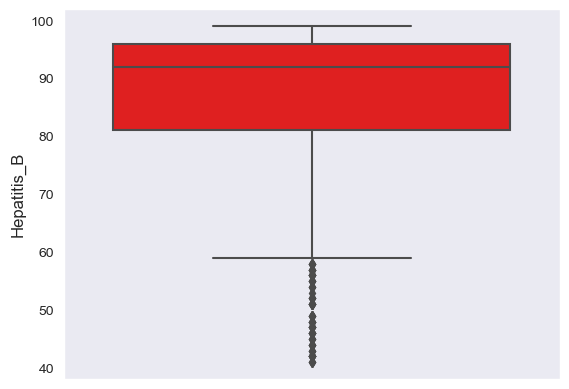

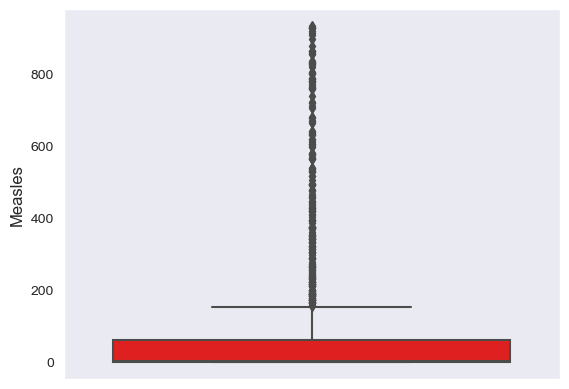

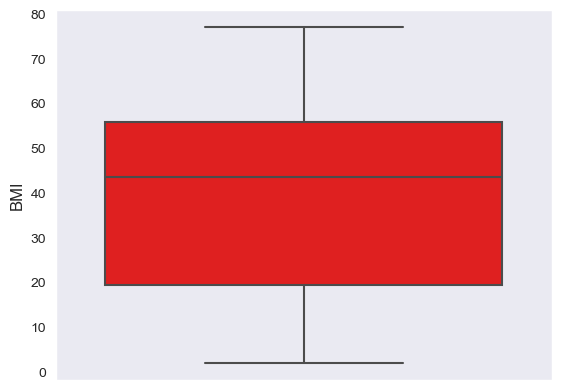

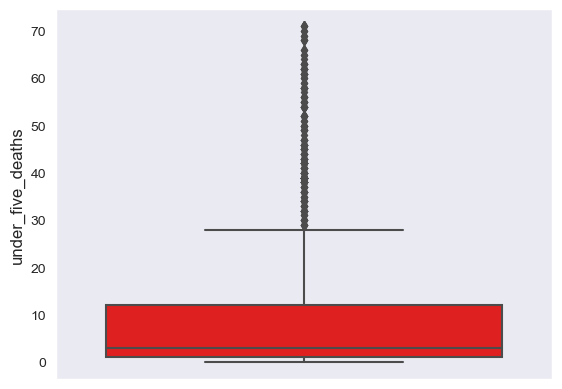

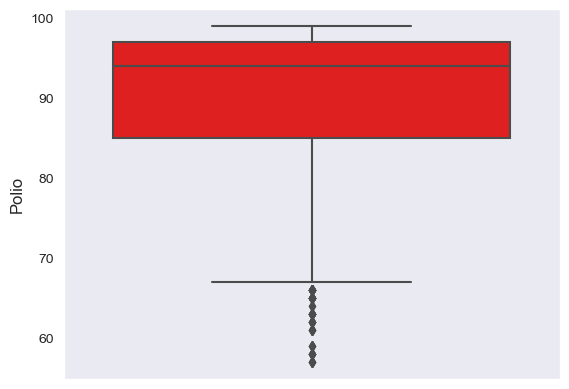

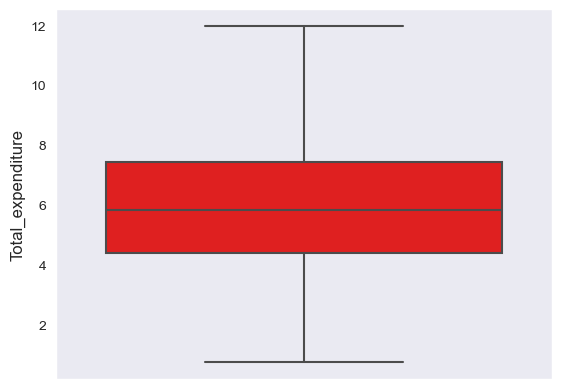

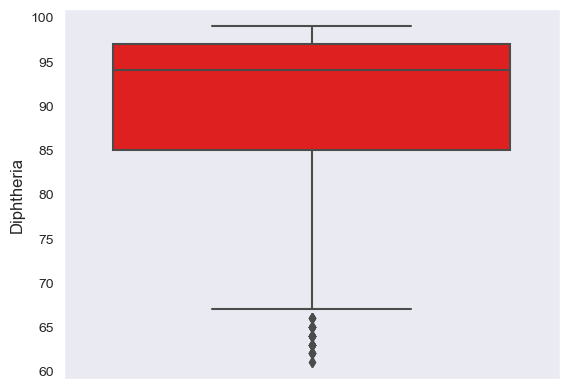

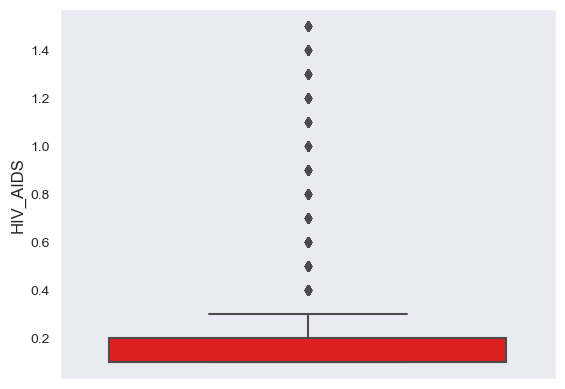

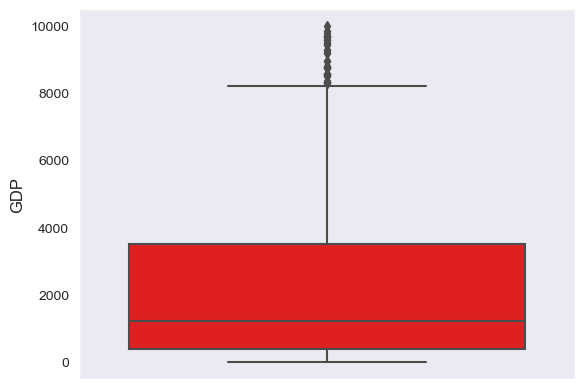

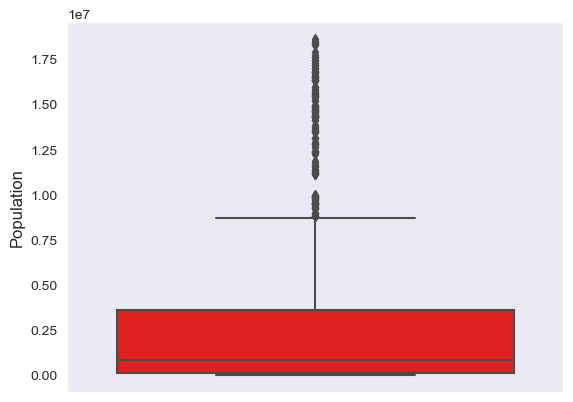

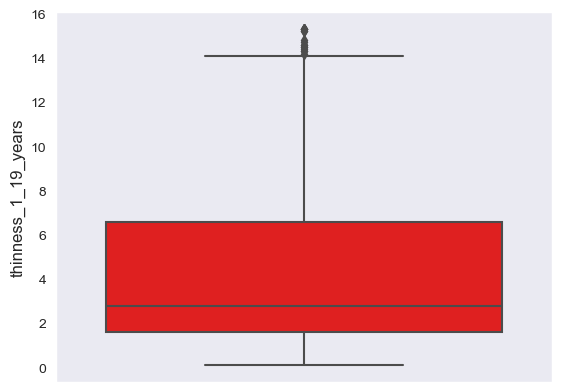

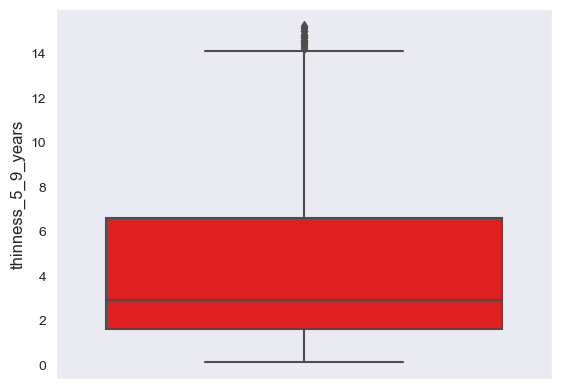

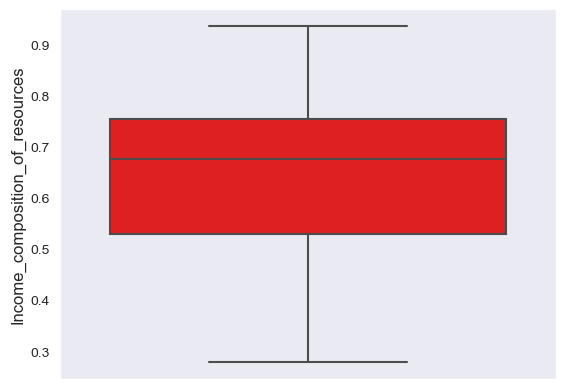

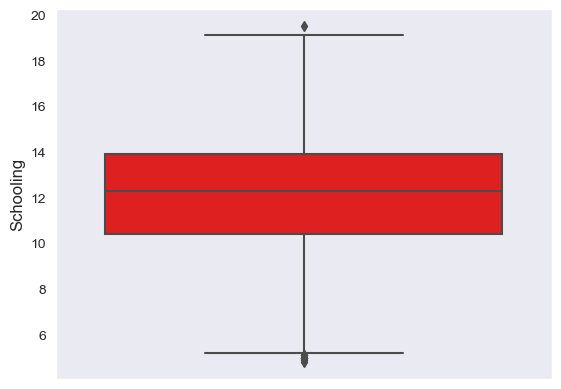

In [36]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color="Red")
        plt.show()

In [37]:
df.isna().sum()

Country                              0
Year                                 0
Life_expectancy                     39
Adult_Mortality                     54
infant_deaths                      199
Alcohol                              2
percentage_expenditure             187
Hepatitis_B                        165
Measles                            297
BMI                                  0
under_five_deaths                  222
Polio                              142
Total_expenditure                    7
Diphtheria                         134
HIV_AIDS                           299
GDP                                208
Population                         233
thinness_1_19_years                 77
thinness_5_9_years                  78
Income_composition_of_resources     48
Schooling                           16
dtype: int64

### Dropping null values after removing outliers

In [38]:
df.dropna(inplace=True)

In [39]:
df.isna().sum()

Country                            0
Year                               0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

## Label encoding the categorical columns

In [40]:
le=LabelEncoder()

In [41]:
df['Country']=le.fit_transform(df['Country'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 16 to 2851
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          646 non-null    int32  
 1   Year                             646 non-null    float64
 2   Life_expectancy                  646 non-null    float64
 3   Adult_Mortality                  646 non-null    float64
 4   infant_deaths                    646 non-null    float64
 5   Alcohol                          646 non-null    float64
 6   percentage_expenditure           646 non-null    float64
 7   Hepatitis_B                      646 non-null    float64
 8   Measles                          646 non-null    float64
 9   BMI                              646 non-null    float64
 10  under_five_deaths                646 non-null    float64
 11  Polio                            646 non-null    float64
 12  Total_expenditure   

## Checking the correlation with the target 'Life expectancy'

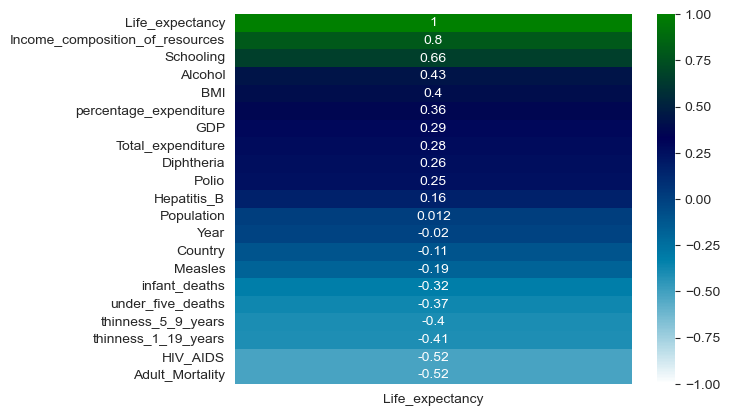

In [43]:
sns.heatmap(df.corr()[["Life_expectancy"]].sort_values(by="Life_expectancy",ascending=False), vmin=-1, vmax=1, annot=True,cmap="ocean_r");

## Lets take only with good correlation with target

In [44]:
x=df[['Income_composition_of_resources','Schooling','Total_expenditure']].values
y=df[['Life_expectancy']].values

### Feature Scaling

In [45]:
sc=StandardScaler()

In [46]:
x = sc.fit_transform(x)

### splitting the data into training and testing set

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Building

In [48]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [49]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  3.1209603453232306
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  3.1216575798296926
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  3.180606703775111
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  4.304487672008603
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3.1817062975371817
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  3.285231203427874
*********************************************

In [50]:
model=LinearRegression()

### Model Fiiting

In [51]:
model.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred=model.predict(x)

In [53]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),dtype=float)

In [54]:
OUTPUT.head()

ACTUAL  PREDICTION
0    77.8   74.942130
1    77.5   74.847494
2    77.2   74.665859
3    76.9   74.297421
4    76.6   74.256039

## VISUALISING THE OUTPUT

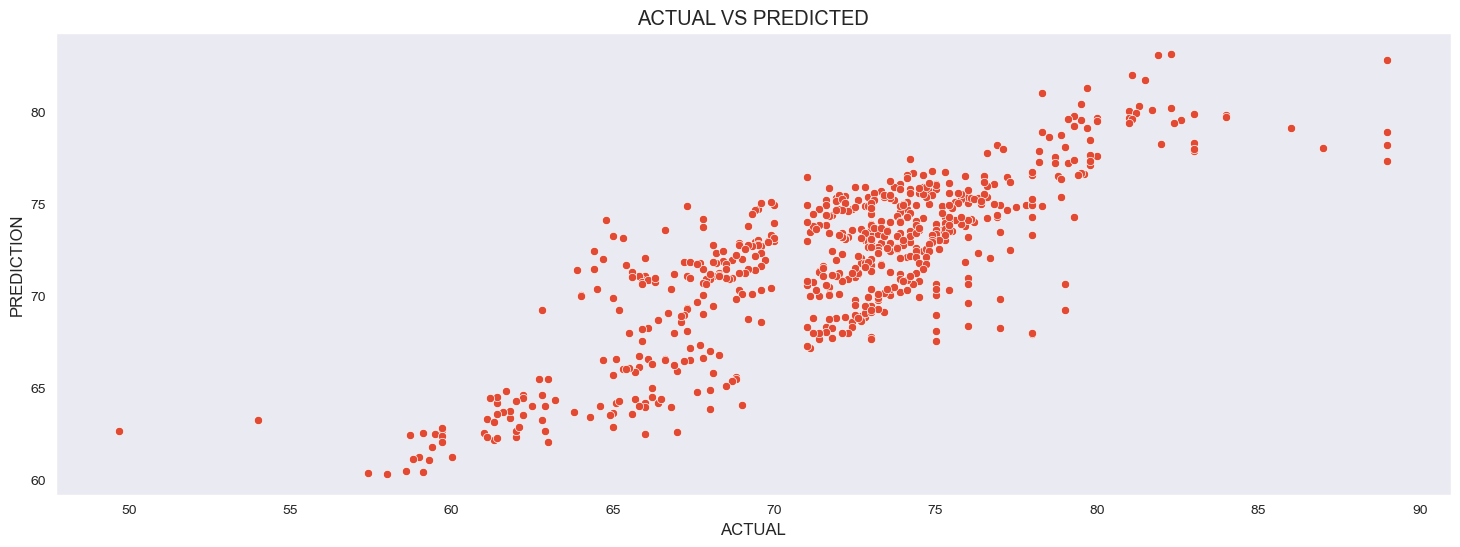

In [55]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT, x ="ACTUAL", y ="PREDICTION");